Quantum Mechanics Cosntants 

In [2]:
h = 6.62607004E-34 #(m^2*kg)/s
c = 3*10**8            #m/s
J = 1.602*10**-19      #conversion factor for eV to Joules, also electron in C
R = 8.3145         #J/mol·K
E_o = 8.8542*10**-12   #𝐶^2/(J*m)
h_b = 1.055*10**-34    #𝐽*𝑠
m_e = 9.109*10**-31      #kg    mass of electron

In [3]:
from sympy import *
from sympy.physics.quantum.operator import *
from sympy.physics.quantum import Commutator
init_printing() 

m, h_b, h, x, f, p, omega, y, z = symbols("m h_b h x f p omega y z")


def COMM(A, B, f):
    return expand((Commutator(A, B)*f).doit())

def x_OP():
    return Operator(x)

def p_OP(x):
    return Operator(-I*h_b*(Derivative("1", x)))

def Hamiltonian(x):
    return Operator(((-(h_b)**2)/(2*m))*((Derivative("1", x, x))))

def aux(f):
    return Operator(Function('f')(x))

def Prod_Rule_Sp(A, B):
    return A*diff_sp(f, x) + B*diff(A, x)

def diff_sp(F, x):
    return Operator(Derivative(Function('f')(x)))

# General Notation

Once the operators are chosen/defined, plug them into the COMM(A, B, f) function. This is used along with the auxillary function, aux(f)

# Try this example: 

Note: This is the x operator and the momentum operator in respect to x

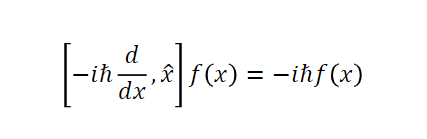

Step one: Plug in the values into the COMM() function:

-f*x*-I*h_b*Derivative(1, x) + f*-I*h_b*Derivative(1, x)*x


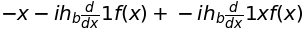

In [4]:
print(COMM(p_OP(x), x_OP(), f).replace("f(x)", "f")) #only modify the two operators being used
display(COMM(p_OP(x), x_OP(), aux(f)))                    #"

Copy and paste the first line into the next cell - the one with the print()

There are two derivatives in this example, and both need to be replaced. 

So, the derivative in the first term, Derivative(1, x)*f will be replaced with:

The derivative in the second term, Derivative(1, x)*x*f, will be replaced with:

I*h_b*x*Derivative(f, x) - I*h_b*(x*Derivative(f, x) + f)


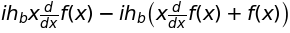

In [13]:
print((-x*-I*h_b*Derivative(aux(f), x) - I*h_b*Prod_Rule_Sp(x, aux(f))).replace("f(x)", "f"))
display(-x*-I*h_b*Derivative(aux(f), x) - I*h_b*Prod_Rule_Sp(x, aux(f)))

In [6]:
expand(I*h_b*x*Derivative(aux(f), x) - I*h_b*(x*Derivative(aux(f), x) + aux(f)))